We investigate a quantum algorithm due to Xin et al, 2020 for solving systems of linear differential
equations. We formulate 3 elementary examples, and implement them in qiskit. We introduce the
notion of success probability in the context of this algorithm. We point out that the problem of
determining certain important operators in this algorithm (not addressed by Xin et al, 2020) can be
regarded as a quantum state preparation problem. We expect that this algorithm does not have an
advantage over classical algorithms.

## Basic gates 

In [2]:
from qiskit import QuantumCircuit
from qiskit import *
from math import *

In [3]:
# Resgister one qubit
q = QuantumRegister(1)

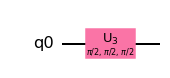

In [6]:
# Circuit drawing a u3(pi/2,pi/2,pi/2) gate

qc = QuantumCircuit(q)
qc.u3(pi/2,pi/2,pi/2,q)
qc.draw('mpl')

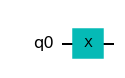

In [7]:
# Circuit drawing one X gate

qc = QuantumCircuit(q)
qc.x(0)
qc.draw('mpl')

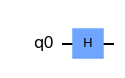

In [8]:
# Circuit drawing an H-gate

qc = QuantumCircuit(q)
qc.h(0)
qc.draw('mpl')

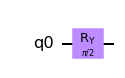

In [9]:
# Circuit drawing Ry(pi/2) gate

qc = QuantumCircuit(q)
qc.ry(pi/2,0)
qc.draw('mpl')

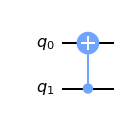

In [10]:
# Control NOT gate with control in qubit 1 and target in 0.

qc = QuantumCircuit(2)
qc.cx(1,0)
qc.draw('mpl')

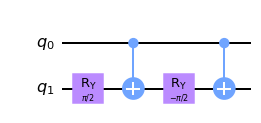

In [11]:
# Controlled Ry-gate

qc = QuantumCircuit(2)

qc.ry(pi/2,1)
qc.cx(0,1)
qc.ry(-pi/2,1)
qc.cx(0,1)



qc.draw('mpl')

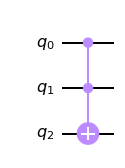

In [12]:
# Toffoli gate

qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw('mpl')

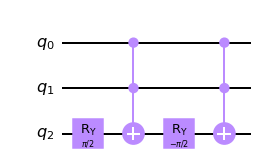

In [13]:
# Double-controlled Ry-gate

qc = QuantumCircuit(3)

qc.ry(pi/2,2)
qc.ccx(0,1,2)
qc.ry(-pi/2,2)
qc.ccx(0,1,2)



qc.draw('mpl')

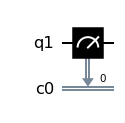

In [14]:

# Measurement gate 

q= QuantumRegister(1)
c= ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.measure(q,c)
qc.draw('mpl')

## Circuit one

This circuit will solve a simple homogeneous linear differential equation.

In [15]:
# Importing libraries

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np

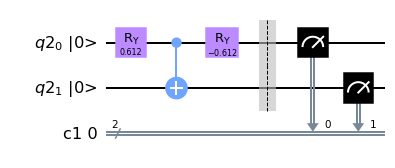

In [16]:
t=0.1  # time used to evaluate the ode

#Taylor series exapnsion
c0=np.cosh(t)
c1=np.sinh(t)

#Theta to rotate the qubits for superposition
theta=np.arctan2(np.sqrt(c1),np.sqrt(c0))

#Quantum registers and circuit
q= QuantumRegister(2)
c= ClassicalRegister(2)
qc = QuantumCircuit(q,c)

#Encoding gates
qc.ry(2*theta,q[0])
qc.cx(q[0],q[1])
qc.ry(-2*theta,q[0])

qc.barrier(q[0],q[1])

#Measure
qc.measure(q,c)
qc.draw('mpl',initial_state=True)

## Running circuit one on the Qasm Simulator

In [17]:
from qiskit import BasicAer, execute
from qiskit.visualization import plot_histogram

In [18]:
# Simulator

backend_sim = BasicAer.get_backend('qasm_simulator')

In [19]:
nshots=8192 # Number of simulations run.

#Qasm simulation
result = execute(qc, backend_sim, shots=nshots).result()
counts = result.get_counts(qc)

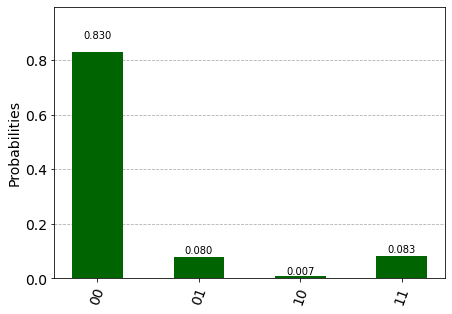

In [20]:
#Results obtained after simulations 
#in all states of the ancilla qubit.

plot_histogram(counts, color="darkgreen")

In [21]:
counts

{'00': 6802, '11': 679, '10': 57, '01': 654}

# Success probability

Success probabilities are probabilities calculated only when the ancilla is in state 0. 

##### Experimental value for the success probability:

In [22]:

# Conditional probabibilties in state |0>
p0 =counts.get('00')/nshots
p1 = counts.get('10')/nshots

# Experimental Success probability
S_p_exp = p0+p1
S_p_exp

0.8372802734375

##### Theoretical value for the success probability:

In [23]:
# Theoretical Success probability

# This was calculated in the thesis
S_p =(c0**2+c1**2)/(c0**2+c1**2+2*c0*c1)
S_p

0.8351600230178197

##### The experimental and theoretical results for the success probability are similar :)

## Solution of the differential equation

In [24]:
# Experimental Solution of the ODE

Y_exp = np.sqrt(p0/p1)
Y_exp

10.923979738782625

In [25]:
# Theoretical solution of the ODE

Y=c0/c1
Y

10.033311132253989

###### The experimetal and theoretical results for the solution of the differential equation are comparable :)

# Running circuit one on a Real device

In [39]:
# Load account

from qiskit import IBMQ
IBMQ.load_account()
provider=IBMQ.get_provider()

ibmqfactory.load_account:WARNING:2021-07-29 15:56:03,280: Credentials are already in use. The existing account in the session will be replaced.


In [40]:
# Getting available Backened

provider.backends(simulator=False, operational=True)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [41]:
# Selecting the backend we want to work with

backened=provider.get_backend('ibmq_santiago',simulator=False,operational=True)
backened.name()


'ibmq_santiago'

In [42]:
# simulating on the real device

nshots=8192

job_real = execute(qc, shots=nshots, backend= backened)
jobid = job_real.job_id()

In [43]:
# Checking the queque to register for using it

job_real.status()

job_real.queue_position()

12

In [44]:
# Getting results from the real device
retrieved_job = backened.retrieve_job(jobid)
result_real= retrieved_job.result()

counts_real= result_real.get_counts(qc)

In [45]:
counts_real

{'00': 6804, '01': 718, '10': 166, '11': 504}

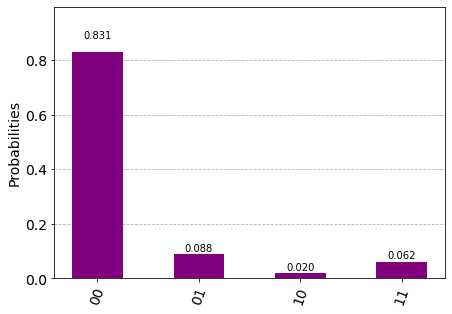

In [46]:
# Plotting results

plot_histogram(counts_real, color='purple')

### Success probability

In [47]:

# Probabilities in state |0>
p0 = counts_real.get('00')/nshots
p1 = counts_real.get('10')/nshots

# Success probability
S_p_Real =p0 + p1
S_p_Real

0.850830078125

### Solution to the ODE

In [48]:
# Real device solution

Y_real = np.sqrt(p0/p1)
Y_real

6.40218336251227

## Running circuit one on the Statevector Simulator

In [26]:
from qiskit.quantum_info import Statevector

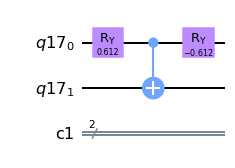

In [27]:
## Same code as above just removed the measure operators.

t=0.1
c0=np.cosh(t)
c1=np.sinh(t)
theta=np.arctan2(np.sqrt(c1),np.sqrt(c0))
q= QuantumRegister(2)
qc = QuantumCircuit(q,c)
qc.ry(2*theta,q[0])
qc.cx(q[0],q[1])
qc.ry(-2*theta,q[0])
qc.draw('mpl')

Initial state:

In [28]:
sv = Statevector.from_label('00')

We evolve the initial state with our circuit:

In [29]:
msv=sv.evolve(qc)

In [30]:
# State of the vector

msv.data

array([ 0.90936538+0.j, -0.28708882+0.j,  0.09063462+0.j,  0.28708882+0.j])

In [31]:
# Converting the vector to real numbers from complex numbers
result=msv.data.real

In [32]:
print(result)

[ 0.90936538 -0.28708882  0.09063462  0.28708882]


Operator for projecting the ancilla qubit to the state |0>:

In [33]:
# Projection operators

idmat=[[1,0],[0,1]] # Identity
proj=[[1,0],[0,0]]  #pi_0 projection operator

print(np.kron(idmat,proj)) # Tensor product of Identity and projection operator

[[1 0 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]]


#### Experimental result for the statevector with the ancilla qubit projected to |0>:

In [34]:
# Matrix multiplication of the vector and results of the tensor product

proj_result=np.dot(np.kron(idmat,proj),result)

In [35]:
# Experimental state vector
print(proj_result)

[0.90936538 0.         0.09063462 0.        ]


#### Theoretical result for the statevector with the ancilla qubit projected to |0>:

In [36]:
Theoretical=[c0/(c0+c1),0,c1/(c0+c1),0]

In [37]:
# Theoretical state vector

print(Theoretical)

[0.909365376538991, 0, 0.09063462346100909, 0]


#### The experimental and theoretical results exactly match :)

# Circuit two

This circuit will solve a homogeneous linear differential equation similar to circuit one. However,
we consider a more complicated matrix A, whose square is not I.

In [38]:
# Importing libraries

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np

The first step will be to find the operator $V$.

\begin{align*}
V=(u^\dagger \otimes v)C_{10}^X(w \otimes I)
\end{align*}



### First unitary

#### The general 2 qubit


$|\underline{\psi}>=\alpha_{00}|00>+\alpha_0|{01}>+\alpha_{10}|10>+\alpha_{11}|11>$

$|\underline{\psi}>=|0>\otimes\alpha_{00}|0>+|0>\otimes\alpha_{01}|1>+|1>\otimes\alpha_{00}|0>+|1>\otimes\alpha_{01}|1>$

$|\underline{\psi}>=|0>\otimes(\alpha_{00}|0>+\alpha_{01}|1>)+|1>\otimes(\alpha_{10}|0>+\alpha_{11}|1>)$

$|\underline{\psi}>=|0>\otimes|\psi>+|1>\otimes|
\phi>$

$|\psi>=\alpha_{00}|0>+\alpha_{01}|1>=\frac{\sqrt{c_0}}{\sqrt{c_0+c_1+c_2+c_3}}|0>+\frac{\sqrt{c_1}}{\sqrt{c_0+c_1+c_2+c_3}}|1>$

$|\psi>=\alpha_{10}|0>+\alpha_{11}|1>=\frac{\sqrt{c_2}}{\sqrt{c_0+c_1+c_2+c_3}}|0>+\frac{\sqrt{c_3}}{\sqrt{c_0+c_1+c_2+c_3}}|1>$

$\alpha_{00}=\frac{\sqrt{c_0}}{\sqrt{c_0+c_1+c_2+c_3}}$

$\alpha_{01}=\frac{\sqrt{c_1}}{\sqrt{c_0+c_1+c_2+c_3}}$

$\alpha_{10}=\frac{\sqrt{c_2}}{\sqrt{c_0+c_1+c_2+c_3}}$

$\alpha_{11}=\frac{\sqrt{c_3}}{\sqrt{c_0+c_1+c_2+c_3}}$

### The inner product and quadratic equation

We would like to choose the complex numbers a and b to make $|\psi'>$ and $|\phi>$ orthogonal. The inner product $<\phi'|\psi'>$ is
\begin{align*}
<\phi'|\psi'>=\frac{a^2}{b^{*2}}<\phi|\psi>+\frac{a}{b^{*}}(<\psi|\psi>-<\phi|\phi>)-<\psi|\phi>
\end{align*}

If $<\phi|\psi>\neq 0$, then setting $<\phi'|\psi'>$ to 0 gives a quadratic equation for $\frac{a}{b^{*}}$, which has two complex solutions


$0=\frac{a^2}{b^{*2}}<\phi|\psi>+\frac{a}{b^{*}}(<\psi|\psi>-<\phi|\phi>)-<\psi|\phi>$

where


$<\phi|\psi>=(<0|\alpha_{10}^*+<1|\alpha_{11}^*)\cdot
(\alpha_{00}|0>+\alpha_{01}|1>)$

$=\alpha_{10}^{*}\alpha_{00}<0|0>+\alpha_{10}^*\alpha_{01}<0|1>+\alpha_{11}^*\alpha_{00}<1|0>+\alpha_{11}^*\alpha_{01}<1|1>$

$=\alpha_{10}^{*}\alpha_{00}+0+0+\alpha_{11}^*\alpha_{01}$

$=\alpha_{10}^{*}\alpha_{00}+\alpha_{11}^*\alpha_{01}$


$<\psi|\phi>=(<0|\alpha_{00}^*+<1|\alpha_{01}^*)\cdot
(\alpha_{10}|0>+\alpha_{11}|1>)$

$=\alpha_{00}^{*}\alpha_{10}<0|0>+\alpha_{00}^*\alpha_{11}<0|1>+\alpha_{01}^*\alpha_{10}<1|0>+\alpha_{01}^*\alpha_{11}<1|1>$

$=\alpha_{00}^{*}\alpha_{10}+0+0+\alpha_{01}^*\alpha_{11}$

$=\alpha_{00}^{*}\alpha_{10}+\alpha_{01}^*\alpha_{11}$




$<\psi|\psi>=(<0|\alpha_{00}^*+<1|\alpha_{01}^*)\cdot
(\alpha_{00}|0>+\alpha_{01}|1>)$

$=\alpha_{00}^{*}\alpha_{00}<0|0>+\alpha_{00}^*\alpha_{01}<0|1>+\alpha_{01}^*\alpha_{00}<1|0>+\alpha_{01}^*\alpha_{01}<1|1>$

$=\alpha_{00}^{*}\alpha_{00}+0+0+\alpha_{01}^*\alpha_{01}$

$=\alpha_{00}^{*}\alpha_{00}+\alpha_{01}^*\alpha_{01}$

$=\alpha_{00}^2+\alpha_{01}^2$




$<\phi|\phi>=(<0|\alpha_{10}^*+<1|\alpha_{11}^*)\cdot
(\alpha_{10}|0>+\alpha_{11}|1>)$

$=\alpha_{10}^{*}\alpha_{10}<0|0>+\alpha_{10}^*\alpha_{11}<0|1>+\alpha_{11}^*\alpha_{10}<1|0>+\alpha_{11}^*\alpha_{11}<1|1>$

$=\alpha_{10}^{*}\alpha_{10}+0+0+\alpha_{11}^*\alpha_{11}$

$=\alpha_{10}^{*}\alpha_{10}+\alpha_{11}^*\alpha_{11}$

$=\alpha_{10}^2+\alpha_{11}^2$



In [39]:
t=1/5 #Time


# Taylor expansion, with k=3
c0=1
c1= t
c2= t**2/2
c3= t**3/6

In [40]:
# Complex numbers

alpha_00=np.sqrt(c0)/np.sqrt(c0+c1+c2+c3)
alpha_01=np.sqrt(c1)/np.sqrt(c0+c1+c2+c3)
alpha_10=np.sqrt(c2)/np.sqrt(c0+c1+c2+c3)
alpha_11=np.sqrt(c3)/np.sqrt(c0+c1+c2+c3)


Let $A=<\phi|\psi>$


$<\phi|\psi>=\alpha_{10}^{*}\alpha_{00}+\alpha_{11}^*\alpha_{01}$

In [41]:
A=alpha_10*alpha_00+alpha_11*alpha_01
A

0.12916317237106772

Let $B=<\psi|\phi>$



$<\psi|\phi>=\alpha_{00}^{*}\alpha_{10}+\alpha_{01}^*\alpha_{11}$

In [42]:
B=alpha_00*alpha_10+alpha_01*alpha_11
B  

0.12916317237106772

Let $C=<\psi|\psi>$



$<\psi|\psi>=\alpha_{00}^2+\alpha_{01}^2$

In [43]:
C=alpha_00**2+alpha_01**2
C

0.982532751091703

Let $D=<\phi|\phi>$


$<\phi|\phi>=\alpha_{10}^2+\alpha_{11}^2$


In [44]:
D=alpha_10**2+alpha_11**2
D

0.01746724890829695

The quadratic equation becomes


$0=\frac{a^2}{b^{*2}}<\phi|\psi>+\frac{a}{b^{*}}(<\psi|\psi>-<\phi|\phi>)-<\psi|\phi>$

$0=\frac{a^2}{b^{*2}}A+\frac{a}{b^{*}}(C-D)-B$

Let E=C-D and $Z=\frac{a}{b^{*}}$


$0=Z^2A+ZE-B$

$Z=\frac{-E\pm\sqrt{E^2+4AB}}{2A}$


In [45]:
E=C-D

In [46]:
# Quadratic solution 1

Z1=(-E+np.sqrt(E**2+4*A*B))/(2*A)
Z1

0.13152355962004403

In [47]:
# Quadratic solution 2

Z2=(-E-np.sqrt(E**2+4*A*B))/(2*A)

Z2

-7.603200543605137



$Z=\frac{a}{b^{*}}$

$b^*=\frac{a}{Z}$


$|a|^2+|b|^2=1$

$|a|^2+|\frac{a}{Z}|^2=1$

$|a|^2|Z|^2+|a|^2=|Z^2|$

$|a|^2(|Z|^2+1)=|Z^2|$

$|a|^2=\frac{|Z^2|}{|Z|^2+1}$

$|a|=\sqrt{\frac{|Z^2|}{|Z|^2+1}}$

In [48]:
#First value of a

a1=np.sqrt((Z1**2)/(Z1**2+1))
a1

0.13040053212483543

In [49]:
#Second value of a

a2=np.sqrt((-Z2)**2/((-Z2)**2+1))
a2

0.9914613967379465

In [50]:
#values of b

b1=a1/Z1
b2=a2/Z2
print(b1)
print(b2)

0.9914613967379465
-0.13040053212483524


We have a and b. Either pair can find the unitary matrix U. In this problem we choose a1 and b1.




$U=\begin{pmatrix}a&-b^*\\b&a^*\end{pmatrix}$

In [51]:
# First unitary u

U=[[a1,-b1],[b1,a1]]
U

[[0.13040053212483543, -0.9914613967379465],
 [0.9914613967379465, 0.13040053212483543]]

## Second unitary

We can pick positive real numbers $\lambda$ and $\mu$ so that $|\psi''>= |\psi'>/\lambda$ and
$|\phi''>= |\phi'>/\mu$ are unit vectors, making $|\psi''>$ and $|\phi''>$ an orthonormal
pair. They are therefore related to $|0>$ and $|1>$ by a unitary transformation v :

$|\psi''>=V|0>$ and $|\phi''>=V|1>$


$V|0>=|\psi''>$

$=\frac{|\psi'>}{\lambda}$

$=\frac{1}{\lambda}(a|\psi > -b^*|\phi>)$

$=\frac{1}{\lambda}[a(\alpha_{00}|0>+\alpha_{01}|1>)-b^*(\alpha_{10}|0>+\alpha_{11}|1>)]$

$=\frac{1}{\lambda}[a\alpha_{00}|0>+a\alpha_{01}|1>)-b^*\alpha_{10}|0>-b^*\alpha_{11}|1>]$

$=\frac{1}{\lambda}[(a\alpha_{00}-b^*\alpha_{10})|0>+(a\alpha_{01}-b^*\alpha_{11})|1>]$

$=\frac{1}{\lambda}\begin{pmatrix}a\alpha_{00}-b^*\alpha_{10}\\a\alpha_{01}-b^*\alpha_{11}\end{pmatrix}$


$V|1>=|\phi''>$

$=\frac{|\phi'>}{\mu}$

$=\frac{1}{\mu}(b|\psi > +a^*|\phi>)$

$=\frac{1}{\mu}[b(\alpha_{00}|0>+\alpha_{01}|1>)+a^*(\alpha_{10}|0>+\alpha_{11}|1>)]$

$=\frac{1}{\mu}[b\alpha_{00}|0>+b\alpha_{01}|1>)+a^*\alpha_{10}|0>+a^*\alpha_{11}|1>]$

$=\frac{1}{\mu}[(b\alpha_{00}+a^*\alpha_{10})|0>+(b\alpha_{01}+a^*\alpha_{11})|1>]$

$=\frac{1}{\mu}\begin{pmatrix}b\alpha_{00}+a^*\alpha_{10}\\b~\alpha_{01}+a^*\alpha_{11}\end{pmatrix}$

### For easy check

Let $X=a\alpha_{00}-b^*\alpha_{10}$ and $Y=a\alpha_{01}-b^*\alpha_{11}$


$V|0>=\frac{1}{\lambda}\begin{pmatrix}a\alpha_{00}-b^*\alpha_{10}\\a\alpha_{01}-b^*\alpha_{11}\end{pmatrix}=\frac{1}{\lambda}\begin{pmatrix}X\\Y\end{pmatrix}$

Let $Z=b\alpha_{00}+a^*\alpha_{10}$ and $K=b~\alpha_{01}+a^*\alpha_{11}$


$V|1>=\frac{1}{\mu}\begin{pmatrix}b\alpha_{00}+a^*\alpha_{10}\\a\alpha_{01}-b^*\alpha_{11}\end{pmatrix}=\frac{1}{\mu}\begin{pmatrix}Z\\K\end{pmatrix}$

In [52]:
# Elements of |\psi_prime>

X= a1*alpha_00-b1*alpha_10
Y= a1*alpha_01-b1*alpha_11

# Elements of |\phi_prime>
Z= b1*alpha_00+a1*alpha_10
K= b1*alpha_01+a1*alpha_11
print('X=',X)
print('Y=',Y)
print('Z=',Z)
print('K=',K)

X= -0.00887967825144298
Y= 0.020009998010686418
Z= 0.9138238286136439
K= 0.405520358985421


A unit vector is a vector of unit length. Any non zero vector can be normalised into a unit vector by its norm. The unit vector must have a magnitude of 1. To convert to a vector to its unit vector find the norm and divide the vector components by the norm.

In our case the $\lambda$ and $\mu$ are the norms that transforms our vectors into a unit vector.

In [53]:
# Norm of Vector |\phi_prime>

lambda_norm=np.sqrt(X**2+Y**2)
lambda_norm

0.021891749729905645

In [54]:
# Norm of Vector v|1> 

mu_norm=np.sqrt(Z**2+K**2)
mu_norm

0.9997603469300845

We can define new values of X,Y,Z and K which we will devide by the calculated values of $\lambda$ and $\mu$.

In [55]:
# Elements of |\psi_double_prime>

X1= X/lambda_norm
Y1= Y/lambda_norm

# Elements of |\phi_double_prime>

Z1= Z/mu_norm
K1= K/mu_norm
print('X1=',X1)
print('Y1=',Y1)
print('Z1=',Z1)                                                                                                           
print('K1=',K1)

X1= -0.4056175664804319
Y1= 0.9140428817963041
Z1= 0.9140428817963008
K1= 0.4056175664804397



$V|0>=\begin{pmatrix}X1\\Y1\end{pmatrix}$

$V|1>=\begin{pmatrix}Z1\\K1\end{pmatrix}$

Therefore V is


$V=\begin{pmatrix}X1&Z1\\Y1&K1\end{pmatrix}$

In [56]:
#second unitary

V=[[X1,Z1],[Y1,K1]]
V

[[-0.4056175664804319, 0.9140428817963008],
 [0.9140428817963041, 0.4056175664804397]]

## Third unitary

Since $| \psi>$ is a unit vector and unitary transformations preserve unit
vectors, it follows that $\lambda|0> + \mu|1>$ is a unit vector. It can
therefore be obtained from $|0>$ by a unitary transformation w .



$W=\begin{pmatrix}\lambda&-\mu\\\mu&\lambda\end{pmatrix}$

In [57]:
# Third unitary

W=[[lambda_norm,-mu_norm],[mu_norm,lambda_norm]]
W

[[0.021891749729905645, -0.9997603469300845],
 [0.9997603469300845, 0.021891749729905645]]

### Verifying if the operators are correct

$(U^{-1}\otimes V)C_{10}(W\otimes I)|00>=V|00>$

We have all the unitaries that we want. To verify we recall the original operator of our problem.


$V|00>=\frac{1}{\sqrt{c_0+c_1+c_2+c_3}}(\sqrt{c_0}|00>+\sqrt{c_1}|01>+\sqrt{c_2}|10>+\sqrt{c_3}|11>)$

$=\begin{pmatrix}\alpha_{00}\\\alpha_{01}\\\alpha_{10}\\\alpha_{11}\end{pmatrix}$

Let Result= $V|00>$

In [58]:
Result=[[alpha_00],[alpha_01],[alpha_10],[alpha_11]]
Result

[[0.9048631347206157],
 [0.40466709591376937],
 [0.1279669717213328],
 [0.033040930022754496]]

### Check $(U^{-1}\otimes V)C_{10}(W\otimes I)|0>\otimes |0>$

In [59]:
#Inverse of U

U_inverse=np.linalg.inv(U)
U_inverse

array([[ 0.13040053,  0.9914614 ],
       [-0.9914614 ,  0.13040053]])

In [60]:
#Identinty
I=[[1,0,],[0,1]]
I

[[1, 0], [0, 1]]

In [61]:
#Tensor product of U^{-1} and V

U1=np.kron(U_inverse,V)
U1

array([[-0.05289275,  0.11919168, -0.40215416,  0.90623823],
       [ 0.11919168,  0.05289275,  0.90623823,  0.40215416],
       [ 0.40215416, -0.90623823, -0.05289275,  0.11919168],
       [-0.90623823, -0.40215416,  0.11919168,  0.05289275]])

In [62]:
#Tensor product of W and I

U2=np.kron(W,I)
U2

array([[ 0.02189175,  0.        , -0.99976035, -0.        ],
       [ 0.        ,  0.02189175, -0.        , -0.99976035],
       [ 0.99976035,  0.        ,  0.02189175,  0.        ],
       [ 0.        ,  0.99976035,  0.        ,  0.02189175]])


$|0>$

In [63]:
# |0>
ket1=[[1],[0]]
ket1

[[1], [0]]



$|0>\otimes|0>=|00>$

In [64]:
ket2=np.kron(ket1,ket1)
ket2

array([[1],
       [0],
       [0],
       [0]])


$C_{10}$

In [65]:
C_10=[[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]
C_10

[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]]


$(W\otimes I)|00>$

In [66]:
# 
S=np.dot(U2,ket2)
S

array([[0.02189175],
       [0.        ],
       [0.99976035],
       [0.        ]])


$C_{10}(W\otimes I)|00>$

In [67]:

T=np.dot(C_10,S)
T

array([[0.02189175],
       [0.        ],
       [0.        ],
       [0.99976035]])


$(U^{-1}\otimes V)C_{10}(W\otimes I)|00>$

In [68]:
np.dot(U1,T)

array([[0.90486313],
       [0.4046671 ],
       [0.12796697],
       [0.03304093]])

In [69]:
Result

[[0.9048631347206157],
 [0.40466709591376937],
 [0.1279669717213328],
 [0.033040930022754496]]

##### The results agree :)  This means the unitary transformations are correct. Next we convert them to the language qiskit understands. We will use the most general unitary.

### V unitary

In [70]:
np.dot(-1,V)

array([[ 0.40561757, -0.91404288],
       [-0.91404288, -0.40561757]])

The most general unitary using the $u_3$ gate
\begin{align*}
U=\begin{pmatrix} \cos(\frac{\theta}{2})&-e^{i\lambda}\sin(\frac{\theta}{2})\\
e^{i\phi}\sin(\frac{\theta}{2})&e^{i\lambda+i\phi}\cos(\frac{\theta}{2})\end{pmatrix}
\end{align*}

All the gates will be of this form but with different angles $(\theta,\phi,\lambda)$

The most general form is called u3 and can be written as

$u3(\theta,\phi,\lambda)=U(\theta,\phi,\lambda)$

$\cos(\frac{\theta}{2})=0.4056$

$\theta=2\cos^{-1}(0.4056)$

### $\lambda$

$-0.91404288=-e^{i\lambda}\sin(\frac{\theta}{2})\\\\
=(-\cos \lambda -i\sin \lambda)\sin(\frac{\theta}{2})$

$-i\sin \lambda \sin(\frac{\theta}{2})=0$

$\sin \lambda=0$

$\lambda=\sin^{-1}0=0=\pi$

## $\phi$

$-0.91404288=e^{i\phi}\sin(\frac{\theta}{2})\\\\
=(\cos \phi +i\sin \phi)\sin(\frac{\theta}{2})$

$i\sin \phi \sin(\frac{\theta}{2})=0$

$\sin \phi=0$

$\phi=\sin^{-1}0=\pi=0$

In [71]:
import math
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit import BasicAer

In [72]:
backend = BasicAer.get_backend('unitary_simulator')

In [73]:
# Theta for u3

theta1= 2*math.acos(0.4056175664804319)
theta1

2.3062839091865723

In [74]:
#lambda for u3

lambd=math.asin(0)
lambd

0.0

u3(θ,ϕ,λ)=U(θ,ϕ,λ)

##### Checking if u3  for unitary v is correct

In [75]:
# Registers
q_reg = QuantumRegister(1)

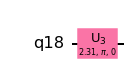

In [76]:
# Circuit

q_circuit = QuantumCircuit(q_reg)
q_circuit.u3(theta1,pi,0,q_reg)
q_circuit.draw('mpl')

In [77]:
# Unitary simulator

job = execute(q_circuit, backend)
job.result().get_unitary(q_circuit, decimals=3)

array([[ 0.406+0.j, -0.914+0.j],
       [-0.914+0.j, -0.406+0.j]])

In [78]:
# The operators agree
np.dot(-1,V)

array([[ 0.40561757, -0.91404288],
       [-0.91404288, -0.40561757]])

### U_inverse 

In [79]:
U_inverse

array([[ 0.13040053,  0.9914614 ],
       [-0.9914614 ,  0.13040053]])

$U=\begin{pmatrix} \cos(\frac{\theta}{2})&-e^{i\lambda}\sin(\frac{\theta}{2})\\
e^{i\phi}\sin(\frac{\theta}{2})&e^{i\lambda+i\phi}\cos(\frac{\theta}{2})\end{pmatrix}$

$\cos(\frac{\theta}{2})=0.13040053$

$\theta=2\cos^{-1}(0.13040053)$

### $\lambda$

$0.9914614 =-e^{i\lambda}\sin(\frac{\theta}{2})$

$=(-\cos \lambda -i\sin \lambda)\sin(\frac{\theta}{2})$

$-i\sin \lambda \sin(\frac{\theta}{2})=0$

$\sin \lambda=0$

$\lambda=\sin^{-1}0=0$

## $\phi$

$0.9914614 =e^{i\phi}\sin(\frac{\theta}{2})\\\\
=(\cos \phi +i\sin \phi)\sin(\frac{\theta}{2})$

$i\sin \phi \sin(\frac{\theta}{2})=0=\pi$

$\sin \phi=0$

$\phi=\sin^{-1}0=0=\pi$

In [80]:
# Theta

theta2= 2*math.acos(0.13040053)
theta2

2.880046756785191

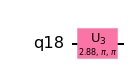

In [81]:
q_circuit = QuantumCircuit(q_reg)
q_circuit.u3(theta2,pi,pi,q_reg)
q_circuit.draw('mpl')

In [82]:
job = execute(q_circuit, backend)
job.result().get_unitary(q_circuit, decimals=3)

array([[ 0.13 +0.j,  0.991-0.j],
       [-0.991+0.j,  0.13 -0.j]])

In [83]:
# The operators agree

U_inverse

array([[ 0.13040053,  0.9914614 ],
       [-0.9914614 ,  0.13040053]])

### W unitary

In [84]:
W

[[0.021891749729905645, -0.9997603469300845],
 [0.9997603469300845, 0.021891749729905645]]

In [85]:
theta3= 2*math.acos(0.021891749729905645)
theta3

3.097805656177976

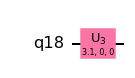

In [86]:
q_circuit = QuantumCircuit(q_reg)
q_circuit.u3(theta3,0,0,q_reg)
q_circuit.draw('mpl')

In [87]:
job = execute(q_circuit, backend)
job.result().get_unitary(q_circuit, decimals=3)

array([[ 0.022+0.j, -1.   +0.j],
       [ 1.   +0.j,  0.022+0.j]])

In [88]:
W

[[0.021891749729905645, -0.9997603469300845],
 [0.9997603469300845, 0.021891749729905645]]

In [89]:
U_inverse

array([[ 0.13040053,  0.9914614 ],
       [-0.9914614 ,  0.13040053]])

# Running circuit two on qasm simulator

In [90]:
from qiskit import BasicAer, execute
from qiskit.visualization import plot_histogram



In [91]:
backend_sim = BasicAer.get_backend('qasm_simulator')

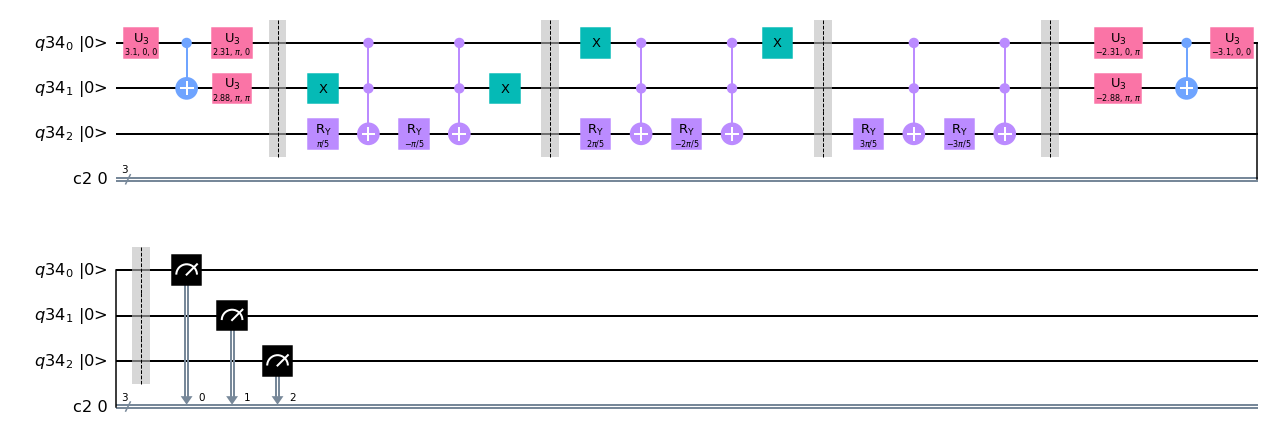

In [92]:
phi= np.arctan2(np.sqrt(c3),np.sqrt(c2))
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

#Angle for the Rotation gate
Beta= pi/5

# Operator V

qc.u3(theta3,0,0,q[0]) #W
qc.cx(q[0],q[1])
qc.u3(theta1,pi,0,q[0]) # V
qc.u3(theta2,pi,pi,q[1]) #U_inverse


# R
#First control is 1 and second control is 0
qc.barrier(q[0],q[1],q[2])
qc.x(q[1])
qc.ry(Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.ry(-Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.x(q[1])

qc.barrier(q[0],q[1],q[2])

#R2
#First control is 0 and second control is 1
#qc.barrier(q[0],q[1],q[2])
qc.x(q[0])
qc.ry(2*Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.ry(-2*Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.x(q[0])

#R3
# Both controls are 1
qc.barrier(q[0],q[1],q[2])

qc.ry(3*Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.ry(-3*Beta,q[2])
qc.ccx(q[0],q[1],q[2])




qc.barrier(q[0],q[1],q[2])

# Operator V^{-1}
qc.u3(-theta2,pi,pi,q[1]) #U_inverse
qc.u3(-theta1,0,pi,q[0])  #V
qc.cx(q[0],q[1])
qc.u3(-theta3,0,0,q[0]) #W

qc.barrier(q[0],q[1],q[2])

qc.measure(q,c)
qc.draw('mpl',initial_state=True)

In [93]:
 nshots=8192 #No. of simulations


#Quasm simulator
result = execute(qc, backend_sim, shots=nshots).result()
counts = result.get_counts(qc)


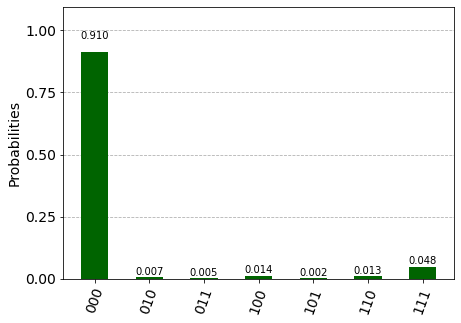

In [94]:
#Results obtained after simulations 
#in all states of the ancilla qubit.


plot_histogram(counts, color="darkgreen")

In [95]:
counts

{'000': 7457,
 '100': 112,
 '111': 397,
 '011': 43,
 '110': 106,
 '010': 60,
 '101': 17}

## Success probability

### Experimental value for the success probability:

In [96]:
count_000= counts.get('000')
count_100=counts.get('100')

In [97]:
# Conditional probabibilties in state |0>
p0 = count_000/nshots
p1 = count_100/nshots

# Success probability
S_p_exp = p0+p1
S_p_exp

0.9239501953125

### Theoretical  success probability:

Theoretical value for the success probability:

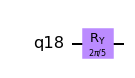

In [98]:
# Encoding matrix R, angle Beta=pi/5 was chosen

q_circuit = QuantumCircuit(q_reg)
q_circuit.ry(2*Beta,q_reg)
q_circuit.draw('mpl')

In [99]:
# The R matrix

job = execute(q_circuit, backend)
R=job.result().get_unitary(q_circuit)
R=R.real
R

array([[ 0.80901699, -0.58778525],
       [ 0.58778525,  0.80901699]])

\begin{align*}
\sum_{k=0}^{1}|<k|\underline{\psi}>|^2=\frac{1}{(C_0+C_1+C_2+C_3)^2}[|<0|(C_0I+C_1R+C_2R^2+C_3R^3)|y(0)>|^2+|<1|(C_0I+C_1R+C_2R^2+C_3R^3)|y(0)>|^2]\\\\
\end{align*}	

$C_0I+C_1R+C_2R^2+C_3R^3$

In [100]:
D=(np.dot(c0,I)+np.dot(c1,R)+np.dot(c2,np.dot(R,R))+np.dot(c3,np.dot(np.dot(R,R),R)))
D

array([[ 1.16757172, -0.13784626],
       [ 0.13784626,  1.16757172]])

$(C_0I+C_1R+C_2R^2+C_3R^3)|y(0)>$

In [101]:
ket_0=[[1],[0]]

In [102]:
a=np.dot(D,ket_0)
a

array([[1.16757172],
       [0.13784626]])

In [103]:
ket_01=[1,0]

$<0|(C_0I+C_1R+C_2R^2+C_3R^3)|y(0)>$

In [104]:
b=np.dot(ket_01,a)

$|<0|(C_0I+C_1R+C_2R^2+C_3R^3)|y(0)>|^2$

In [105]:
b**2

array([1.36322371])

$|<1|(C_0I+C_1R+C_2R^2+C_3R^3)|y(0)>|^2$

In [106]:
ket_11=[0,1]

In [107]:
c=np.dot(ket_11,a)
c**2

array([0.01900159])

In [108]:
b**2+c**2

array([1.3822253])

###### Theoretical success probability

In [109]:
# Theoretical success probability

S_p=(b**2+c**2)/(c0+c1+c2+c3)**2
S_p[0]

0.9266386661904186

In [110]:
# Experimental Success probability

S_p_exp = p0+p1
S_p_exp

0.9239501953125

###### Theoretical and experimental success probabilities agree :)

### Solution to the differential equation

#### Theoretical solution to the differential equation

$C_0I+C_1R+C_2R^2+C_3R^3$

In [111]:
# Let D=c0I + C1R + C2R^2 + C3R^3

D=(np.dot(c0,I)+np.dot(c1,R)+np.dot(c2,np.dot(R,R))+np.dot(c3,np.dot(np.dot(R,R),R)))
D

array([[ 1.16757172, -0.13784626],
       [ 0.13784626,  1.16757172]])

$(C_0I+C_1R+C_2R^2+C_3R^3)|y(0)>$

In [112]:
# |0>

ket_0=[[1],[0]]

In [113]:
# y(t) = (c0I + C1R + C2R^2 + C3R^3) |0>

a=np.dot(D,ket_0)
a

array([[1.16757172],
       [0.13784626]])

In [114]:
y_0= 1.16757172
y_1= 0.13784626

In [115]:
# Theoretical solution of the ODE

Y = y_0/y_1
Y

8.470100821016109

## Experimental solution of the differential equation

In [116]:
# Experimental solution of the ODE

Y_exp = np.sqrt(p0/p1)
Y_exp

8.159678740174588

In [117]:
# Comparing with the theoretical

Y = y_0/y_1
Y

8.470100821016109

# Running circuit two on the Statevector Simulator

In [118]:
from qiskit.quantum_info import Statevector

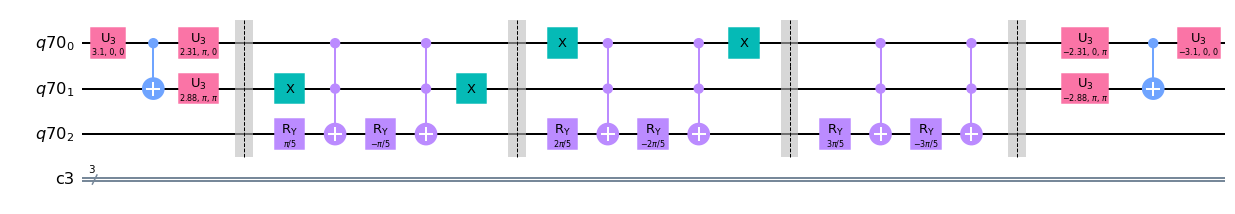

In [119]:

phi= np.arctan2(np.sqrt(c3),np.sqrt(c2))

# Registers and circuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

#Angle for the Rotation gate

Beta= pi/5


qc.u3(theta3,0,0,q[0]) #W
qc.cx(q[0],q[1])
qc.u3(theta1,pi,0,q[0]) # V
qc.u3(theta2,pi,pi,q[1]) #U_inverse

#First control is 1 and second control is 0
qc.barrier(q[0],q[1],q[2])
qc.x(q[1])
qc.ry(Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.ry(-Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.x(q[1])


#First control is 0 and second control is 1
qc.barrier(q[0],q[1],q[2])
qc.x(q[0])
qc.ry(2*Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.ry(-2*Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.x(q[0])


# Both controls are 1
qc.barrier(q[0],q[1],q[2])

qc.ry(3*Beta,q[2])
qc.ccx(q[0],q[1],q[2])
qc.ry(-3*Beta,q[2])
qc.ccx(q[0],q[1],q[2])




qc.barrier(q[0],q[1],q[2])

qc.u3(-theta2,pi,pi,q[1]) #U_inverse
qc.u3(-theta1,0,pi,q[0])  #V
qc.cx(q[0],q[1])
qc.u3(-theta3,0,0,q[0]) #W

qc.draw('mpl')

Initial state:

In [120]:
sv = Statevector.from_label('000')

In [121]:
msv=sv.evolve(qc)

In [122]:
msv.data

array([ 0.95598121-2.67583018e-16j,  0.00461297+1.46370171e-17j,
        0.09187202-1.07034564e-17j,  0.07254507+5.37026529e-17j,
        0.11286538-5.52806428e-17j, -0.04635716+7.22282698e-18j,
       -0.10566253+4.13299450e-17j, -0.21522835+1.06280167e-16j])

In [123]:
result=msv.data.real

In [124]:
print(result)

[ 0.95598121  0.00461297  0.09187202  0.07254507  0.11286538 -0.04635716
 -0.10566253 -0.21522835]


Operator for projecting the ancilla qubit to the state |00>:

In [125]:
idmat=[[1,0],[0,1]]   #Indentity matrix
proj=[[1,0],[0,0]]    # projection operator
A=np.kron(idmat,proj) # Tensor product of I and proj
B=np.kron(A,proj)     # Another tensor product

In [126]:
proj_result=np.dot(B,result)  # Multiplying by the vector from the state vector simulation

In [127]:
print(proj_result)

[0.95598121 0.         0.         0.         0.11286538 0.
 0.         0.        ]


## Theoretical state vector

In [128]:
# |0>

ket_0=[[1],[0]]

In [129]:
# (c0I + C1R + C2R^2 + C3R^3) |0> matrix mulitplication

k=np.dot(D,ket_0)

In [130]:
# Tensor product of (c0I + C1R + C2R^2 + C3R^3) |0>  and |0> 

r=np.kron(k,ket_0)
r

array([[1.16757172],
       [0.        ],
       [0.13784626],
       [0.        ]])

In [131]:
# Tensor product of (c0I + C1R + C2R^2 + C3R^3) |0>  and |0>, and |0>

r1=np.kron(r,ket_0)
r1

array([[1.16757172],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.13784626],
       [0.        ],
       [0.        ],
       [0.        ]])

In [132]:
# Vector r1 divided by (c0_c1+c2+c3)

r1/(c0+c1+c2+c3)

array([[0.95598121],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.11286538],
       [0.        ],
       [0.        ],
       [0.        ]])

In [133]:
print(proj_result)

[0.95598121 0.         0.         0.         0.11286538 0.
 0.         0.        ]


# Circuit three

In [134]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np

In [135]:
from qiskit import BasicAer, execute
from qiskit.visualization import plot_histogram
 
backend_sim = BasicAer.get_backend('qasm_simulator')

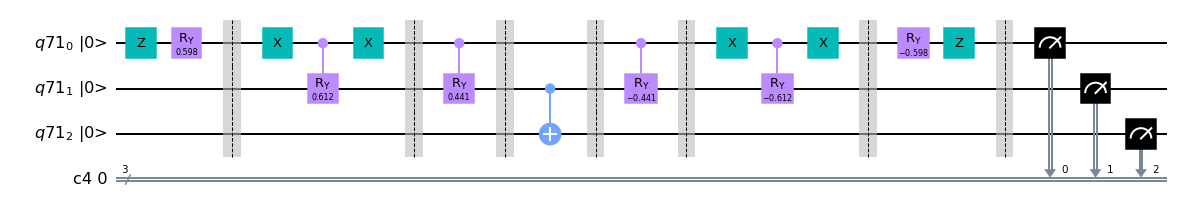

In [136]:
t=0.1  #time used to evaluate the ode

#Taylor series exapnsion
c0= np.cosh(t)
c1= np.sinh(t)
d0= np.sin(t)
d1= np.cosh(t)-1


#Normalisation
C= np.sqrt(c0+c1)
D= np.sqrt(d0+d1)
N= np.sqrt(C**2+D**2)



#Angles to rotate the qubits for superposition
psi= np.arctan2(D,C)
theta=np.arctan2(np.sqrt(c1),np.sqrt(c0))
phi=np.arctan2(np.sqrt(d1),np.sqrt(d0))



#Quantum registers and circuit
q= QuantumRegister(3)
c= ClassicalRegister(3)
qc = QuantumCircuit(q,c)

#Encoding gates

#V-gate
qc.z(q[0])
qc.ry(2*psi,q[0])
qc.barrier(q[0],q[1],q[2])

#Controlled ry with 0 control qubit
qc.x(q[0])
qc.cry(2*theta,q[0],q[1])
qc.x(q[0])
qc.barrier(q[0],q[1],q[2])

#Controlled ry with 1 control qubit
qc.cry(2*phi,q[0],q[1])
qc.barrier(q[0],q[1],q[2])

# cNOT-gate
qc.cx(q[1],q[2])
qc.barrier(q[0],q[1],q[2])

#Inverse Controlled ry with 1 control qubit
qc.cry(-2*phi,q[0],q[1])
qc.barrier(q[0],q[1],q[2])

#Inverse Controlled ry with 0 control qubit
qc.x(q[0])
qc.cry(-2*theta,q[0],q[1])
qc.x(q[0])
qc.barrier(q[0],q[1],q[2])

#Inverse V-gate
qc.ry(-2*psi,q[0])
qc.z(q[0])

qc.barrier(q[0],q[1],q[2])

#Measure
qc.measure(q,c)
qc.draw('mpl',initial_state=True)

## Running circuit three on a qasm simulator

In [137]:
 nshots=8192 #No. of simulations


#Quasm simulator
result = execute(qc, backend_sim, shots=nshots).result()
counts = result.get_counts(qc)


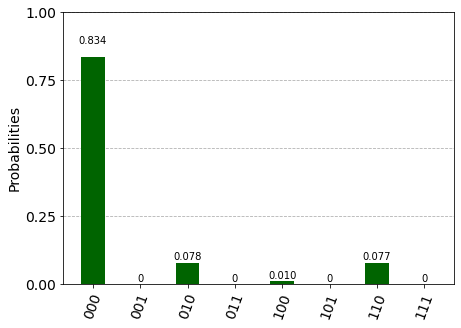

In [138]:
 #plot results
plot_histogram(counts, color="darkgreen")

In [139]:
counts

{'000': 6832,
 '110': 631,
 '010': 636,
 '111': 4,
 '100': 81,
 '101': 3,
 '011': 4,
 '001': 1}

## Success probability

### Experimental value for the success probability:

In [140]:
# Probabilities for which the ancillas are in |00> state 
p0 = counts.get('000')/nshots
p1 = counts.get('100')/nshots

# Success probability

S_p_exp = p0 + p1
S_p_exp

0.8438720703125

## Theoretical value of success probability

\begin{align*}
 |\underline{\psi_5}>=\frac{1}{C^2+D^2}[(C_0I+C_1X)|y(0)>+(D_0I+D_1X)|b>]
 \end{align*}

\begin{align*}
S_p=\sum_{k=0}^{1}|<k|\underline{\psi_5}>|^2
\end{align*}




$S_p=\frac{1}{(D^2+C^2)^2}|<0|(C_0+XC_1)|0>+<1|C_0+XC_1|0>|^2+\frac{1}{(D^2+C^2)^2}|<0|(D_0+XD_1)|0>+<1|D_0+XD_1|0>|^2$

In [141]:
I= [[1,0],[0,1]]  # Identity
X= [[0,1],[1,0]]  # A=X
ket_0 = [1,0]     # <0|
ket_1 = [[1],[0]]  # |0>
ket_10 =[0,1]      # <1|

In [142]:
# C0I + C1X 

A=(np.dot(c0,I)+np.dot(c1,X))
A

array([[1.00500417, 0.10016675],
       [0.10016675, 1.00500417]])

In [143]:
# <0|(C0I+c1X)|0> + <1|(C0I+c1X)|0>

a=np.dot(np.dot(ket_0,A),ket_1) +  np.dot(np.dot(ket_10,A),ket_1)
a**2

array([1.22140276])

In [144]:

c=a**2*(1/((D**2+C**2)**2))
c

array([0.83422279])

In [145]:
# D0I + D1X 

B=(np.dot(d0,I)+np.dot(X,d1))
B

array([[0.09983342, 0.00500417],
       [0.00500417, 0.09983342]])

In [146]:
# <0|(D0I+D1X)|0> + <1|(D0I+D1X)|0>

b=np.dot(np.dot(ket_0,B),ket_1) +  np.dot(np.dot(ket_10,B),ket_1)
b**2

array([0.01099092])

In [147]:
d=b**2*(1/((D**2+C**2)**2))
d

array([0.00750684])

## Theoretical success probability

In [148]:
c+d

array([0.84172963])

In [149]:
# Comparing 
print(S_p_exp)
print(c+d[0])

0.8438720703125
[0.84172963]


###### Theoretical and experimental solution agree

## Solution to the differential equation

### Theoretical solution to the differential equation

${y(t)}=(c_0I+c_1X)|y(0)>+(d_0I+d_1X)|b>$

In [150]:
I= [[1,0],[0,1]] 
X= [[0,1],[1,0]]
y_0= [[1],[0]]
b=   [[1],[0]]

In [151]:
# y(t) = (C0 I + C1X)|y(0)> + (D0 I + D1X) |b>
np.dot((np.dot(c0,I)+np.dot(c1,X)),y_0) + np.dot((np.dot(d0,I)+np.dot(d1,X)),b)

array([[1.10483758],
       [0.10517092]])

In [152]:
y0=1.10516667
y1=0.10516667

In [153]:
Y = y0/y1
Y

10.508716021910743

## Experimental solution of the differential equation

In [154]:
np.sqrt(p0/p1)

9.183990364343034

#### Theoretical and experimental solution agree

## Running circuit three on the Statevector Simulator

In [155]:
from qiskit.quantum_info import Statevector

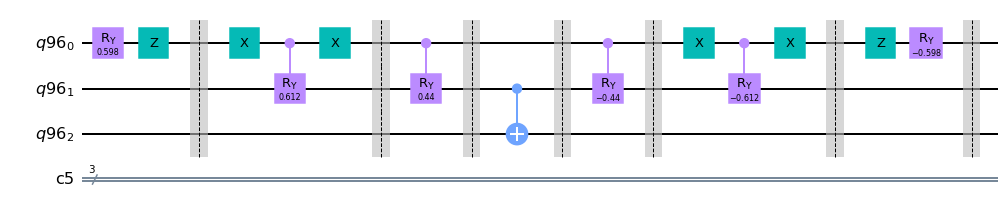

In [156]:
t=0.1  #time used to evaluate the ode

#Taylor series exapnsion
c0= 1+t**2/2
c1= t+t**3/6
d0= t+t**3/6
d1= t**2/2


#Normalisation
C= np.sqrt(c0+c1)
D= np.sqrt(d0+d1)
N= np.sqrt(C**2+D**2)


#Angles to rotate the qubits for superposition
psi= np.arctan2(D,C)
theta=np.arctan2(np.sqrt(c1),np.sqrt(c0))
phi=np.arctan2(np.sqrt(d1),np.sqrt(d0))


#Quantum registers and circuit
q= QuantumRegister(3)
c= ClassicalRegister(3)
qc = QuantumCircuit(q,c)

#Encoding gates

#V-gate
qc.ry(2*psi,q[0])
qc.z(q[0])
qc.barrier(q[0],q[1],q[2])

#Controlled ry with 0 control qubit
qc.x(q[0])
qc.cry(2*theta,q[0],q[1])
qc.x(q[0])
qc.barrier(q[0],q[1],q[2])

#Controlled ry with 1 control qubit
qc.cry(2*phi,q[0],q[1])
qc.barrier(q[0],q[1],q[2])

# cNOT-gate
qc.cx(q[1],q[2])
qc.barrier(q[0],q[1],q[2])

#Inverse Controlled ry with 1 control qubit
qc.cry(-2*phi,q[0],q[1])
qc.barrier(q[0],q[1],q[2])

#Inverse Controlled ry with 0 control qubit
qc.x(q[0])
qc.cry(-2*theta,q[0],q[1])
qc.x(q[0])
qc.barrier(q[0],q[1],q[2])

#Inverse V-gate
qc.z(q[0])
qc.ry(-2*psi,q[0])

qc.barrier(q[0],q[1],q[2])

#Measure
#qc.measure(q,c)
qc.draw('mpl')

### Experimental state vector

Initial state:

In [157]:
sv = Statevector.from_label('000')

In [158]:
msv=sv.evolve(qc)

In [159]:
msv.data

array([ 0.91310934+0.j,  0.01213774+0.j, -0.28063403+0.j,  0.02092583+0.j,
        0.08689066+0.j, -0.01213774+0.j,  0.28063403+0.j, -0.02092583+0.j])

In [160]:
result=msv.data.real

In [161]:
print(result)

[ 0.91310934  0.01213774 -0.28063403  0.02092583  0.08689066 -0.01213774
  0.28063403 -0.02092583]


Operator for projecting the ancilla qubit to the state |0>:

In [162]:
idmat=[[1,0],[0,1]] # Identity matrix
proj=[[1,0],[0,0]]  # projection operator
A1=np.kron(idmat,proj)  # Tensor product 
B1=np.kron(A1,proj)   # Tensor product

In [163]:
proj_result=np.dot(B1,result)

In [164]:
proj_result

array([0.91310934, 0.        , 0.        , 0.        , 0.08689066,
       0.        , 0.        , 0.        ])

In [165]:
print(proj_result)

[0.91310934 0.         0.         0.         0.08689066 0.
 0.         0.        ]


### Theoretical state vector

In [166]:
# F= (C0I + C1X )|0> \otimes |0> \otimes |0>
# S= (D0I + D1X )|0> \otimes |0> \otimes |0>

F=np.kron(np.kron(np.dot(A,ket_1),ket_1),ket_1)*(1/(D**2+C**2))
S=np.kron(np.kron(np.dot(B,ket_1),ket_1),ket_1)*(1/(D**2+C**2))

F+S

array([[0.91283744],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.08689418],
       [0.        ],
       [0.        ],
       [0.        ]])

Experimental and theoretical state vector agree